# Funciones

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_variables(df, target, variables=None):
    if variables is None:
        variables = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
        variables.remove(target)  # Eliminamos la variable objetivo

    num_vars = len(variables)
    cols = 3  # Número de columnas en la cuadrícula de subplots
    rows = (num_vars // cols) + (num_vars % cols > 0)  # Ajustar número de filas
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  # Convertimos en un array 1D para indexar fácilmente

    for i, var in enumerate(variables):
        sns.scatterplot(x=df[var], y=df[target], ax=axes[i], alpha=0.6)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(target)
        axes[i].set_title(f'{var} vs {target}')
    
    # Ocultar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
def plot_correlation_heatmap(df, method=None):
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns  # Solo numéricas
    corr_matrix = df[numeric_cols].corr(method=method) if method else df[numeric_cols].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
    plt.title('Correlación entre las Variables')
    plt.show()

# Carga de datos

In [2]:
import pandas as pd

# Cargar los datos
user_data = pd.read_csv("../train/user_train.csv")
session_data = pd.read_csv("../train/session_train.csv")

In [3]:
session_data.head()

,user_id,session_id,timestamp,device_type,browser,operating_system,ip_address,country,search_query,page_views,session_duration
0,64ec8ab8-a6f5-491f-8c1a-e6cd28f4471b,0b98d388-87f7-4202-b2ab-b63cb7aea9bc,2023-09-06 18:10:01,mobile,Firefox,iOS,17.236.24.58,Saudi Arabia,Left myself writer decision plan few.,8,54
1,64ec8ab8-a6f5-491f-8c1a-e6cd28f4471b,fb626371-21a7-453b-a9ff-67a7a53ac19c,2023-04-02 23:09:10,desktop,Edge,Linux,92.110.53.157,Eritrea,Prevent state action sure save.,9,255
2,64ec8ab8-a6f5-491f-8c1a-e6cd28f4471b,b51b4fa7-a79a-44fc-bf41-3b6079d676fb,2023-08-09 08:07:32,mobile,Firefox,Windows,110.203.61.8,Mali,Hear write edge you skill newspaper.,3,296
3,64ec8ab8-a6f5-491f-8c1a-e6cd28f4471b,41ca9c65-c0f4-47fa-ad36-6652e3bc59a6,2023-08-13 11:20:40,tablet,Edge,iOS,190.106.161.28,Barbados,Thing standard teach same arrive.,8,217
4,64ec8ab8-a6f5-491f-8c1a-e6cd28f4471b,5f90aa6e-2395-4eba-919a-cc27c9fa1eac,2023-03-23 13:34:47,desktop,Edge,iOS,33.69.13.184,San Marino,Choice hear stand avoid clear material nothing.,9,229


In [4]:
user_data.head()

,user_id;age;abandoned_cart;user_category;marketing_target
0,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e;28;FALSE;...
1,c93cb31f-dab2-4d8f-b8de-ec5466b764c1;54;FALSE;...
2,262c06e0-96d7-45bc-bbff-060bae8a6f52;23;TRUE;p...
3,3eb387fe-6afc-4e23-9e3c-26457d97e446;53;FALSE;...
4,65596ffc-3bf1-4d45-8589-37bfce2f4d72;62;FALSE;...


## Corregimos formato user_data

In [5]:
user_data = pd.read_csv("../train/user_train.csv", delimiter=";")
user_data.head()

,user_id,age,abandoned_cart,user_category,marketing_target
0,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1
1,c93cb31f-dab2-4d8f-b8de-ec5466b764c1,54,False,premium_subscriber,1
2,262c06e0-96d7-45bc-bbff-060bae8a6f52,23,True,premium_subscriber,1
3,3eb387fe-6afc-4e23-9e3c-26457d97e446,53,False,recurring_user,1
4,65596ffc-3bf1-4d45-8589-37bfce2f4d72,62,False,recurring_user,1


# Analizamos los dataframes: `user_data` | `session_data`

In [6]:
user_data.describe(include="all")

,user_id,age,abandoned_cart,user_category,marketing_target
count,700,700.000000,700,700,700.000000
unique,700,NaN,2,3,NaN
top,d25667f3-471b-45d5-9398-dd0164e82ded,NaN,False,premium_subscriber,NaN
freq,1,NaN,362,245,NaN
mean,NaN,43.815714,NaN,NaN,1.335714
std,NaN,15.027358,NaN,NaN,0.642005
min,NaN,18.000000,NaN,NaN,1.000000
25%,NaN,31.000000,NaN,NaN,1.000000
50%,NaN,44.000000,NaN,NaN,1.000000
75%,NaN,56.000000,NaN,NaN,1.000000


In [7]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           700 non-null    object
 1   age               700 non-null    int64 
 2   abandoned_cart    700 non-null    bool  
 3   user_category     700 non-null    object
 4   marketing_target  700 non-null    int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 22.7+ KB


In [8]:
session_data.describe(include="all")

,user_id,session_id,timestamp,device_type,browser,operating_system,ip_address,country,search_query,page_views,session_duration
count,6877,6877,6877,6877,6877,6877,6877,6877,6877,6877.000000,6877.000000
unique,700,6877,6876,3,4,5,6877,243,6877,NaN,NaN
top,705c813b-ef36-4b80-adc1-62a61ac0225f,9e6bf192-d142-4e1b-92c4-fb9b099d2c76,2023-02-14 17:50:45,tablet,Edge,iOS,116.45.231.217,Korea,Reach mother ten add citizen example.,NaN,NaN
freq,15,1,2,2345,1782,1429,1,57,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.536135,160.271630
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280831,80.590149
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,90.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,161.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,228.000000


In [9]:
session_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           6877 non-null   object
 1   session_id        6877 non-null   object
 2   timestamp         6877 non-null   object
 3   device_type       6877 non-null   object
 4   browser           6877 non-null   object
 5   operating_system  6877 non-null   object
 6   ip_address        6877 non-null   object
 7   country           6877 non-null   object
 8   search_query      6877 non-null   object
 9   page_views        6877 non-null   int64 
 10  session_duration  6877 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 591.1+ KB


## Verificamos valores nulos

In [10]:
# Verificar valores nulos en ambos datasets
print("Valores nulos en user_data:")
print(user_data.isnull().sum())

print("\nValores nulos en session_data:")
print(session_data.isnull().sum())

Valores nulos en user_data:
user_id             0
age                 0
abandoned_cart      0
user_category       0
marketing_target    0
dtype: int64

Valores nulos en session_data:
user_id             0
session_id          0
timestamp           0
device_type         0
browser             0
operating_system    0
ip_address          0
country             0
search_query        0
page_views          0
session_duration    0
dtype: int64


## Convertimos `timestamp` a tipo `datetime`

In [11]:
# Convertir la columna timestamp a tipo datetime
session_data["timestamp"] = pd.to_datetime(session_data["timestamp"])

# Verificar el cambio
print(session_data.dtypes["timestamp"])
print(session_data["timestamp"].head())


datetime64[ns]
0   2023-09-06 18:10:01
1   2023-04-02 23:09:10
2   2023-08-09 08:07:32
3   2023-08-13 11:20:40
4   2023-03-23 13:34:47
Name: timestamp, dtype: datetime64[ns]


### Características adicionales a partir de `timestamp`, pueden influir en el comportamiento del usuario.


In [12]:
# Extraer nuevas características de la fecha
session_data["day_of_week"] = session_data["timestamp"].dt.dayofweek  # 0=Lunes, 6=Domingo
session_data["hour_of_day"] = session_data["timestamp"].dt.hour  # Hora de la sesión

# Verificar que las nuevas columnas se han añadido correctamente
session_data[["timestamp", "day_of_week", "hour_of_day"]].head()


,timestamp,day_of_week,hour_of_day
0,2023-09-06 18:10:01,2,18
1,2023-04-02 23:09:10,6,23
2,2023-08-09 08:07:32,2,8
3,2023-08-13 11:20:40,6,11
4,2023-03-23 13:34:47,3,13


## Calculamos estadísticas agregadas por usuario (múltiples sessiones)

In [13]:
# Agrupar por usuario y calcular estadísticas
user_session_stats = session_data.groupby("user_id").agg(
    total_sessions=("session_id", "count"),
    avg_session_duration=("session_duration", "mean"),
    total_page_views=("page_views", "sum")
).reset_index()

In [14]:
user_session_stats.head()

,user_id,total_sessions,avg_session_duration,total_page_views
0,00019a96-41bd-455e-bdc9-54b5cf623d01,7,184.857143,41
1,01041ca7-a8f3-482a-87a7-5acfacc4d5a1,12,181.583333,91
2,011da192-0d1c-4f62-a293-0b766489dc5b,11,198.727273,74
3,01b14c78-b839-49cb-94a4-1b78e206e929,9,211.222222,55
4,0265b4a2-68a0-4ebb-ad96-7b05bea2ba11,5,229.600000,41


### Merge con `user_data`

In [15]:
# Unir user_data con las estadísticas de sesión
user_merged = user_data.merge(user_session_stats, on="user_id", how="left")

# Revisar si la fusión fue exitosa
user_merged.head()

,user_id,age,abandoned_cart,user_category,marketing_target,total_sessions,avg_session_duration,total_page_views
0,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,11,185.272727,65
1,c93cb31f-dab2-4d8f-b8de-ec5466b764c1,54,False,premium_subscriber,1,9,161.777778,56
2,262c06e0-96d7-45bc-bbff-060bae8a6f52,23,True,premium_subscriber,1,5,174.400000,30
3,3eb387fe-6afc-4e23-9e3c-26457d97e446,53,False,recurring_user,1,7,157.285714,46
4,65596ffc-3bf1-4d45-8589-37bfce2f4d72,62,False,recurring_user,1,10,148.000000,64


In [16]:
# Verificar valores nulos en las nuevas columnas
print(user_merged[["total_sessions", "avg_session_duration", "total_page_views"]].isnull().sum())


total_sessions          0
avg_session_duration    0
total_page_views        0
dtype: int64


# Analizamos la variable objetivo `marketing_target` 

- **(1 - Bajo)** 75,86% 
- **(2 - Medio)** 14.71 % 
- **(3 - Alto)** 9.43 %

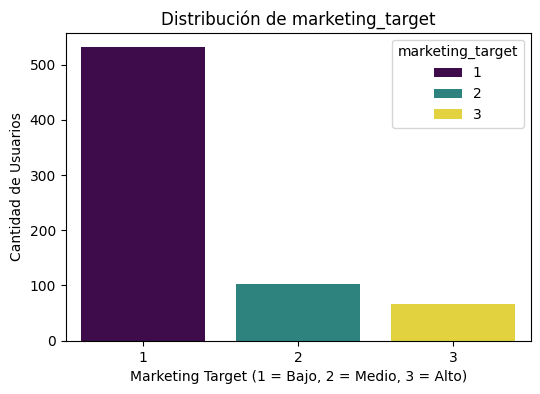

marketing_target
1    75.857143
2    14.714286
3     9.428571
Name: proportion, dtype: float64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de usuarios por categoría de marketing_target
plt.figure(figsize=(6, 4))
sns.countplot(data=user_merged, x="marketing_target", palette="viridis", hue='marketing_target')
plt.title("Distribución de marketing_target")
plt.xlabel("Marketing Target (1 = Bajo, 2 = Medio, 3 = Alto)")
plt.ylabel("Cantidad de Usuarios")
plt.show()

# Calcular la distribución en porcentajes
target_distribution = user_merged["marketing_target"].value_counts(normalize=True) * 100

# Mostrar los resultados
print(target_distribution)

### Análisis de correlación entre la variables numéricas y marketing_target

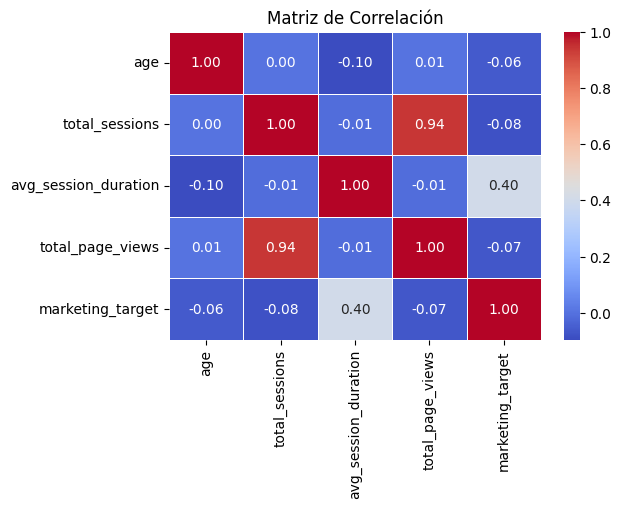

In [19]:
# Calcular la matriz de correlación
correlation_matrix = user_merged[["age", "total_sessions", "avg_session_duration", "total_page_views", "marketing_target"]].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

- `avg_session_duration `tiene una correlación moderada (0.40) con `marketing_target`, lo que indica que la duración promedio de la sesión podría ser una variable relevante para predecir el nivel de engagement.
- `total_sessions` y `total_page_views` están altamente correlacionados entre sí (0.94), lo que sugiere que podríamos eliminar una de estas variables para evitar colinealidad.
- `age` y `total_sessions` tienen una correlación muy baja con `marketing_target`, lo que indica que podrían no ser tan útiles para la predicción.

### Exploremos la relación entre `marketing_target` y `user_category` (variable categórica) 
- Para ver si los distintos tipos de usuarios (`new_user`, `recurring_user`, `premium_subscriber`) están distribuidos de manera desigual en los niveles de engagement.

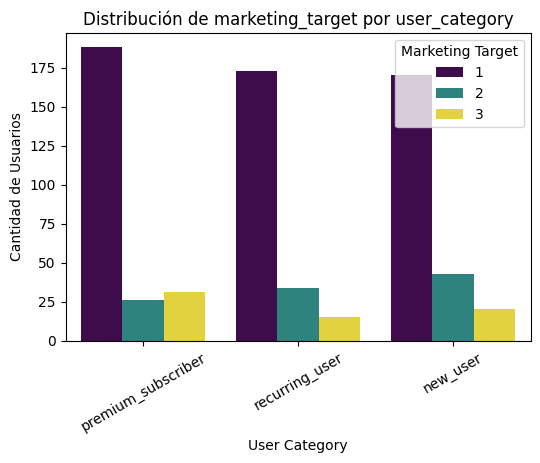

In [20]:
# Distribución de marketing_target por user_category
plt.figure(figsize=(6, 4))
sns.countplot(data=user_merged, x="user_category", hue="marketing_target", palette="viridis")
plt.title("Distribución de marketing_target por user_category")
plt.xlabel("User Category")
plt.ylabel("Cantidad de Usuarios")
plt.xticks(rotation=30)
plt.legend(title="Marketing Target")
plt.show()


- `user_category` podría ser una característica útil para el modelo, pero por sí sola no es suficiente para diferenciar claramente los niveles de engagement.

# Exploramos las variables categóricas de `session_data`

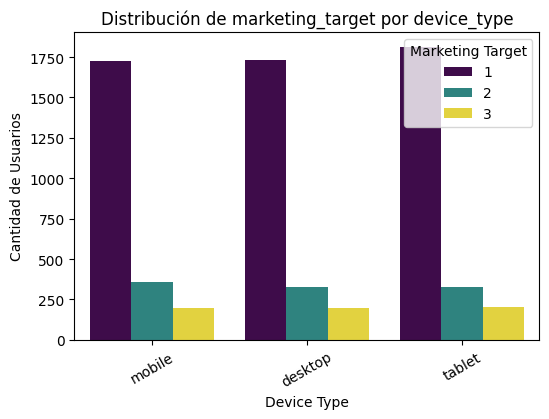

In [21]:
# Distribución de marketing_target por device_type
plt.figure(figsize=(6, 4))
sns.countplot(data=user_merged.merge(session_data[["user_id", "device_type"]], on="user_id", how="left"),
              x="device_type", hue="marketing_target", palette="viridis")
plt.title("Distribución de marketing_target por device_type")
plt.xlabel("Device Type")
plt.ylabel("Cantidad de Usuarios")
plt.xticks(rotation=30)
plt.legend(title="Marketing Target")
plt.show()


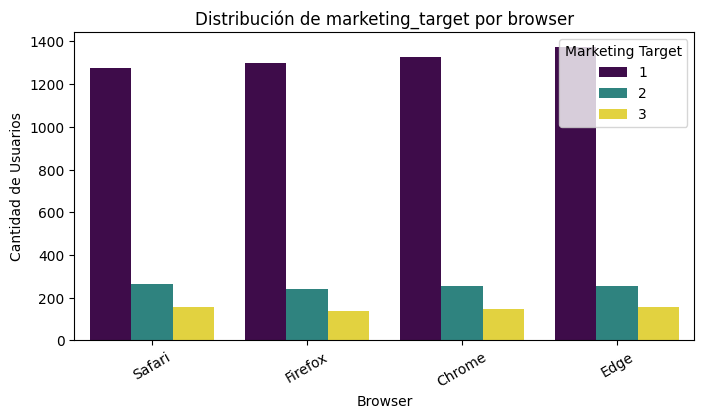

In [22]:
# Distribución de marketing_target por browser
plt.figure(figsize=(8, 4))
sns.countplot(data=user_merged.merge(session_data[["user_id", "browser"]], on="user_id", how="left"),
              x="browser", hue="marketing_target", palette="viridis")
plt.title("Distribución de marketing_target por browser")
plt.xlabel("Browser")
plt.ylabel("Cantidad de Usuarios")
plt.xticks(rotation=30)
plt.legend(title="Marketing Target")
plt.show()

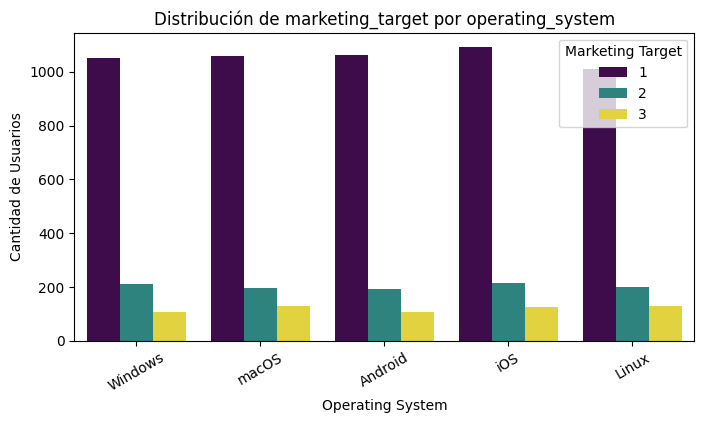

In [23]:
# Distribución de marketing_target por operating_system
plt.figure(figsize=(8, 4))
sns.countplot(data=user_merged.merge(session_data[["user_id", "operating_system"]], on="user_id", how="left"),
              x="operating_system", hue="marketing_target", palette="viridis")
plt.title("Distribución de marketing_target por operating_system")
plt.xlabel("Operating System")
plt.ylabel("Cantidad de Usuarios")
plt.xticks(rotation=30)
plt.legend(title="Marketing Target")
plt.show()

- `operating_system`, al igual que `browser` y `device_type`, no parece ser una característica predictiva fuerte.

In [24]:
# Contar el número de países únicos
num_paises = session_data["country"].nunique()

# Mostrar el resultado
print(f"Número de países distintos en el dataset: {num_paises}")

# Mostrar los países más frecuentes
print("\nTop 10 países con más sesiones:")
print(session_data["country"].value_counts().head(10))

Número de países distintos en el dataset: 243

Top 10 países con más sesiones:
country
Korea            57
Congo            53
Taiwan           46
Faroe Islands    41
Anguilla         40
Mongolia         40
Egypt            38
Brazil           38
French Guiana    38
Austria          38
Name: count, dtype: int64


# Merge de datasets

In [25]:
# Fusionar user_merged con session_data
full_data = user_merged.merge(session_data, on="user_id", how="left")

# Ver las primeras filas para asegurarnos de que el merge fue exitoso
display(full_data.head())

# Verificar el tamaño del nuevo dataset
print(f"Tamaño del dataset fusionado: {full_data.shape}")


,user_id,age,abandoned_cart,user_category,marketing_target,total_sessions,avg_session_duration,total_page_views,session_id,timestamp,device_type,browser,operating_system,ip_address,country,search_query,page_views,session_duration,day_of_week,hour_of_day
0,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,11,185.272727,65,de10a475-e7a4-4086-8025-19e371af79e2,2023-03-22 00:03:46,mobile,Safari,Windows,157.33.207.208,Lithuania,Middle beat later can.,6,235,2,0
1,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,11,185.272727,65,6a863d00-21dd-4fb0-9d10-e0494ab999ce,2023-04-26 05:09:21,mobile,Firefox,macOS,9.197.105.100,United States of America,Myself mean issue option sign for mission.,3,196,2,5
2,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,11,185.272727,65,d8f3dc0d-d343-4b85-86d3-f7b0fc64bbdc,2023-02-23 14:04:10,desktop,Firefox,Windows,117.121.111.15,Moldova,Ground hear growth get woman allow.,5,174,3,14
3,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,11,185.272727,65,dff85134-a9f1-4687-b222-abad3cdc5b0e,2023-08-15 15:24:36,mobile,Chrome,Android,174.110.113.128,Gabon,Western them social station common best measure.,3,285,1,15
4,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,11,185.272727,65,23bccabf-f335-4d4d-a916-8785da73a47f,2023-02-14 14:39:35,desktop,Firefox,macOS,214.253.53.156,Mozambique,Least that wait teach also she.,8,237,1,14


Tamaño del dataset fusionado: (6877, 20)


# Análisis de `full_data` 

## Revisamos tipos de datos

In [26]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               6877 non-null   object        
 1   age                   6877 non-null   int64         
 2   abandoned_cart        6877 non-null   bool          
 3   user_category         6877 non-null   object        
 4   marketing_target      6877 non-null   int64         
 5   total_sessions        6877 non-null   int64         
 6   avg_session_duration  6877 non-null   float64       
 7   total_page_views      6877 non-null   int64         
 8   session_id            6877 non-null   object        
 9   timestamp             6877 non-null   datetime64[ns]
 10  device_type           6877 non-null   object        
 11  browser               6877 non-null   object        
 12  operating_system      6877 non-null   object        
 13  ip_address        

In [27]:
# Verificar valores únicos en columnas categóricas para detectar posibles conversiones
categorical_cols = ["user_category", "device_type", "browser", "operating_system", "country"]
for col in categorical_cols:
    print(f"{col}: {full_data[col].nunique()} valores únicos")

# Verificar valores únicos en columnas numéricas
numeric_cols = ["age", "total_sessions", "avg_session_duration", "total_page_views", "page_views", "session_duration", "day_of_week", "hour_of_day"]
print("\nResumen de valores en columnas numéricas:")
print(full_data[numeric_cols].describe())

# Revisar si hay valores duplicados en user_id o session_id
print(f"\nUsuarios únicos: {full_data['user_id'].nunique()} de {len(full_data)} filas")
print(f"Sesiones únicas: {full_data['session_id'].nunique()} de {len(full_data)} filas")


user_category: 3 valores únicos
device_type: 3 valores únicos
browser: 4 valores únicos
operating_system: 5 valores únicos
country: 243 valores únicos

Resumen de valores en columnas numéricas:
               age  total_sessions  avg_session_duration  total_page_views  \
count  6877.000000     6877.000000           6877.000000       6877.000000   
mean     43.835248       10.818526            160.271630         70.776211   
std      15.011816        2.984581             26.428991         21.307551   
min      18.000000        5.000000             85.666667         23.000000   
25%      31.000000        8.000000            142.307692         54.000000   
50%      44.000000       11.000000            159.142857         71.000000   
75%      56.000000       14.000000            177.071429         89.000000   
max      70.000000       15.000000            244.500000        122.000000   

        page_views  session_duration  day_of_week  hour_of_day  
count  6877.000000       6877.000000  

### Convertimos tipos de datos

In [28]:
# Convertir a tipo categoría
categorical_cols = ["user_category", "device_type", "browser", "operating_system"]
for col in categorical_cols:
    full_data[col] = full_data[col].astype("category")

# Verificar cambios en los tipos de datos
print(full_data.dtypes)

user_id                         object
age                              int64
abandoned_cart                    bool
user_category                 category
marketing_target                 int64
total_sessions                   int64
avg_session_duration           float64
total_page_views                 int64
session_id                      object
timestamp               datetime64[ns]
device_type                   category
browser                       category
operating_system              category
ip_address                      object
country                         object
search_query                    object
page_views                       int64
session_duration                 int64
day_of_week                      int32
hour_of_day                      int32
dtype: object


## Histogramas

In [29]:
full_data.columns

Index(['user_id', 'age', 'abandoned_cart', 'user_category', 'marketing_target',
       'total_sessions', 'avg_session_duration', 'total_page_views',
       'session_id', 'timestamp', 'device_type', 'browser', 'operating_system',
       'ip_address', 'country', 'search_query', 'page_views',
       'session_duration', 'day_of_week', 'hour_of_day'],
      dtype='object')

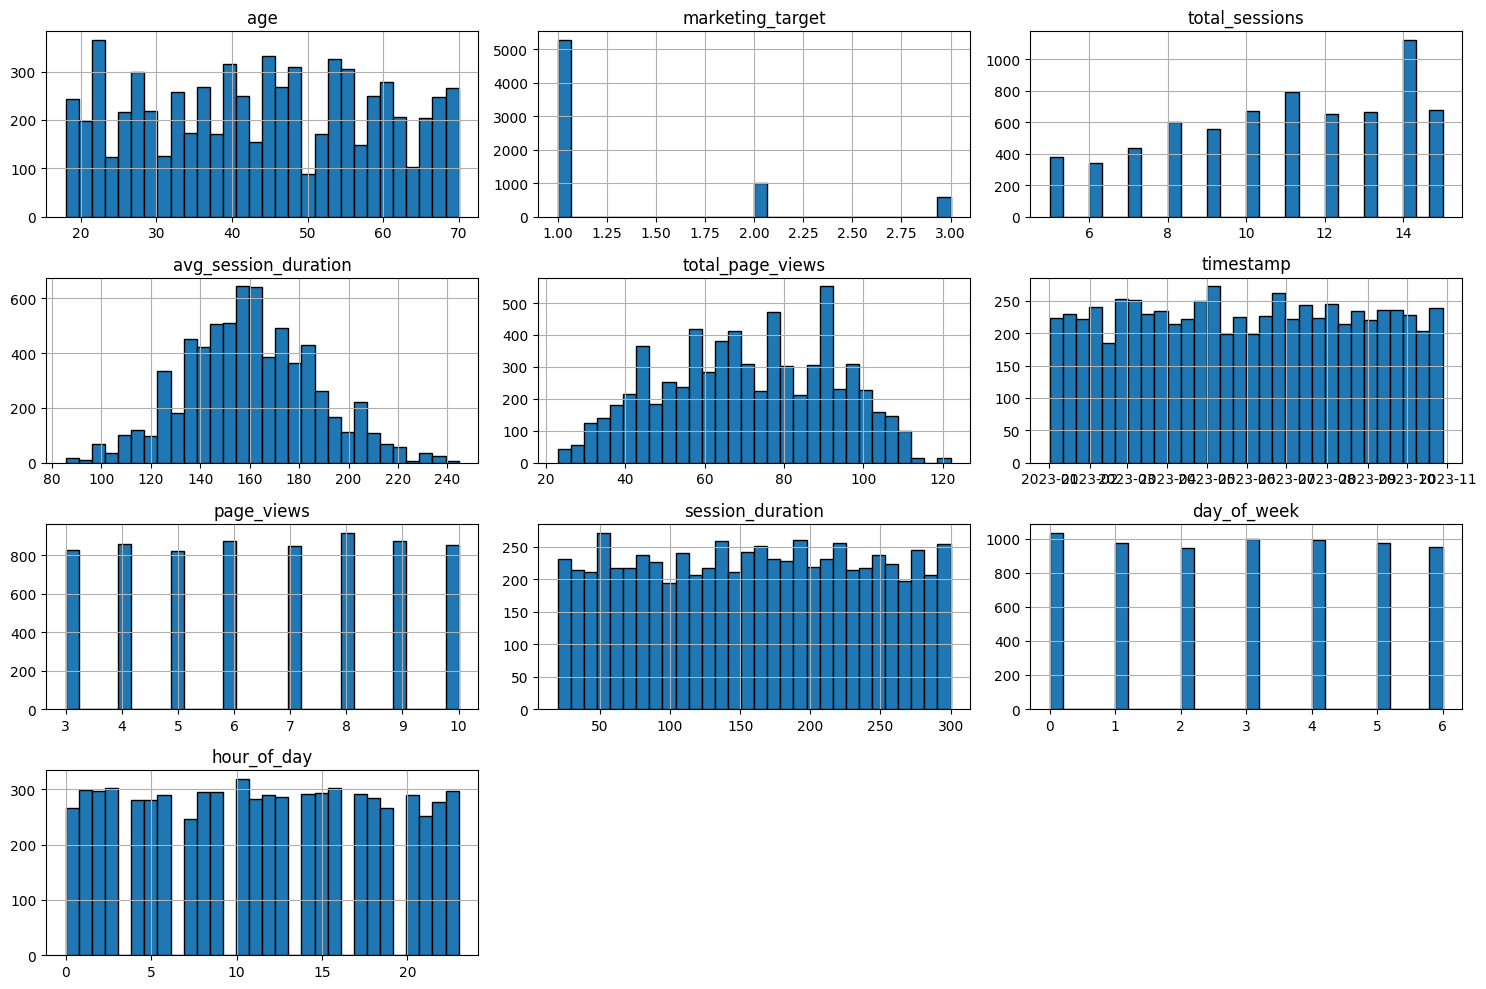

In [30]:
full_data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

## Scatters

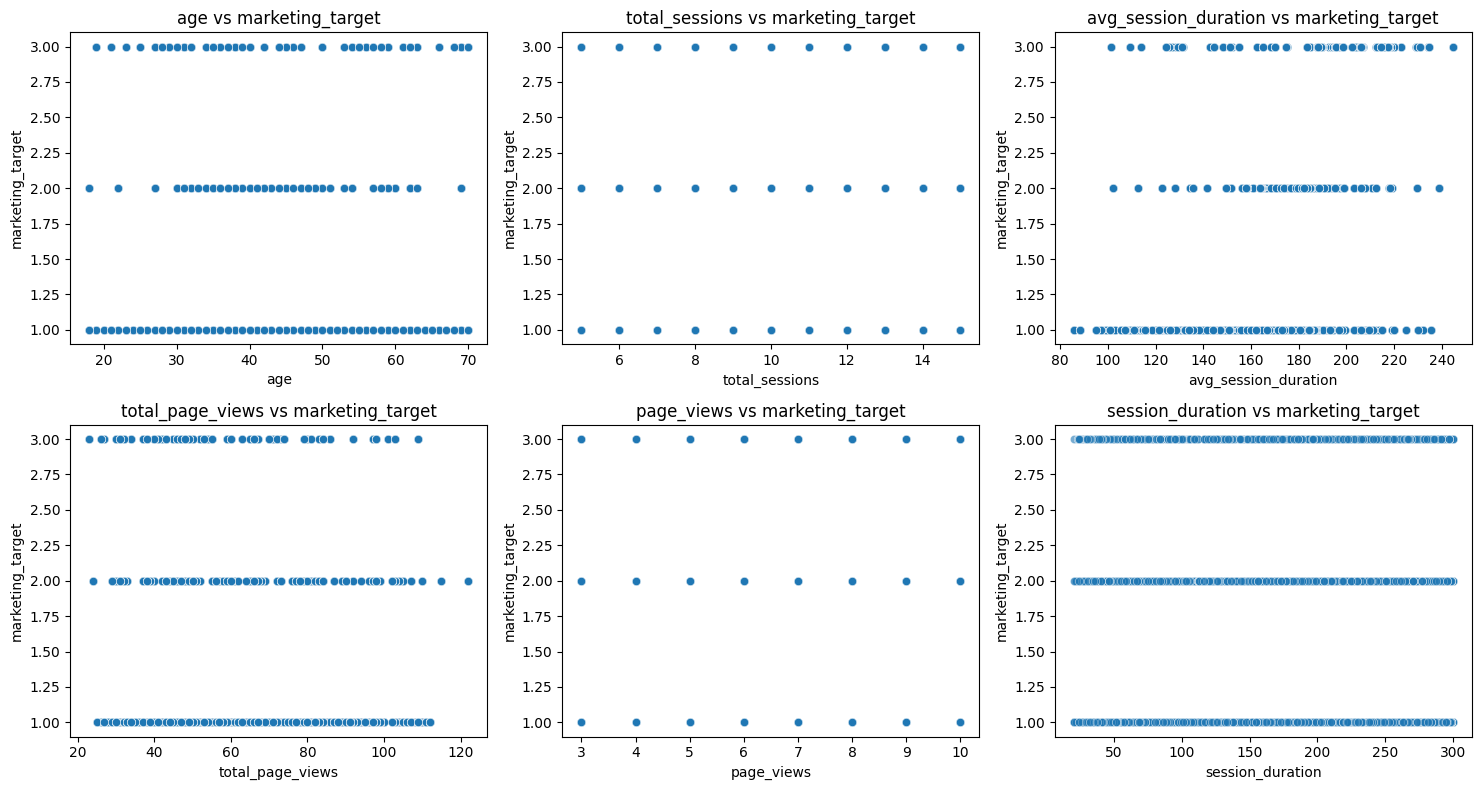

In [31]:
plot_scatter_variables(full_data, target="marketing_target")

## Correlation

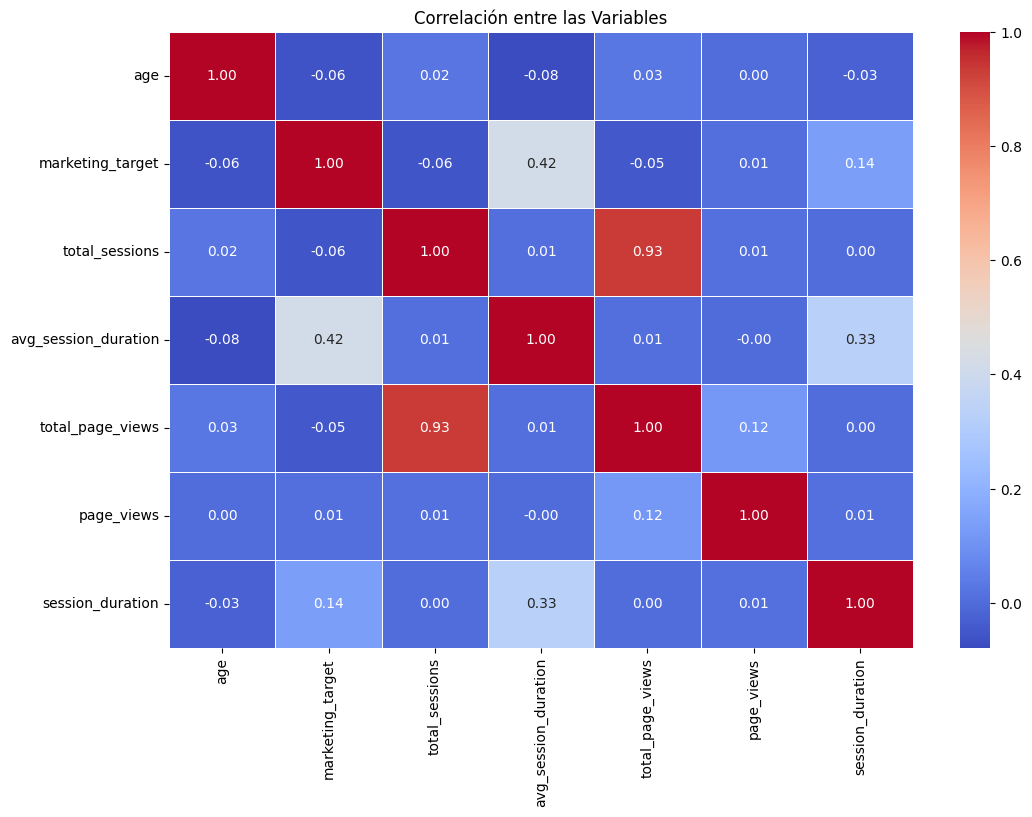

In [32]:
plot_correlation_heatmap(full_data)

# Análisis inicial dataset `test`

In [33]:
# Cargar los datos de test
user_test = pd.read_csv("../test/user_test.csv", delimiter=";")
session_test = pd.read_csv("../test/session_test.csv")

# Mostrar las primeras filas de cada dataset
display(user_test.head(), session_test.head())

# Revisar información general
print("\nInformación de user_test:")
print(user_test.info())

print("\nInformación de session_test:")
print(session_test.info())

# Verificar si 'marketing_target' está en los datos de test
print("\n¿Tiene user_test la columna 'marketing_target'?")
print("marketing_target" in user_test.columns)


,user_id,age,abandoned_cart,user_category,test_id
0,6647f967-609f-4ae3-986b-424ffbf0460a,52,True,new_user,1
1,ca149ac0-0832-4bcd-8af0-43c2d8f06556,45,True,new_user,2
2,b0d21d65-e040-418d-af69-0be68b456792,29,False,new_user,3
3,42519363-3dcf-445a-8116-dced9581cbd7,20,False,recurring_user,4
4,9d582590-d05e-4c79-8b18-3feb98864927,55,True,recurring_user,5


,user_id,session_id,timestamp,device_type,browser,operating_system,ip_address,country,search_query,page_views,session_duration
0,1982e6a0-077b-49f2-bc6e-84411c326f90,f0da5632-1c71-4c93-b2fd-f5423adc063c,2023-08-15 05:58:37,tablet,Edge,Windows,137.193.176.120,Kenya,As program perhaps high.,6,240
1,1982e6a0-077b-49f2-bc6e-84411c326f90,a48fbcc6-13a5-425c-9c2f-7413d8fd5e51,2023-10-22 22:47:09,desktop,Chrome,Windows,149.188.238.246,Svalbard & Jan Mayen Islands,Goal wonder allow ability get.,8,253
2,1982e6a0-077b-49f2-bc6e-84411c326f90,3f86b518-2dbd-4f81-b261-f16d6573f035,2023-01-06 21:33:30,mobile,Chrome,Android,218.150.179.144,Hungary,Month vote rich already stock.,7,196
3,1982e6a0-077b-49f2-bc6e-84411c326f90,14be0db1-c86f-4db0-b4b5-ff1a97615232,2023-10-07 04:50:38,desktop,Edge,macOS,40.157.118.33,United States Virgin Islands,Owner produce bring factor subject shoulder who.,10,126
4,1982e6a0-077b-49f2-bc6e-84411c326f90,5f5b2da5-4fa2-4877-b930-a57dd6303964,2023-08-25 15:54:55,mobile,Edge,Android,63.173.100.237,Mayotte,Ask key central rate within television appear.,8,138



Información de user_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         300 non-null    object
 1   age             300 non-null    int64 
 2   abandoned_cart  300 non-null    bool  
 3   user_category   300 non-null    object
 4   test_id         300 non-null    int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 9.8+ KB
None

Información de session_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           3026 non-null   object
 1   session_id        3026 non-null   object
 2   timestamp         3026 non-null   object
 3   device_type       3026 non-null   object
 4   browser           3026 non-null   object
 5   operating_system  3026 non-null  

In [34]:
# Verificar cuántos usuarios de test están en train
usuarios_train = set(user_data["user_id"])
usuarios_test = set(user_test["user_id"])

usuarios_nuevos = usuarios_test - usuarios_train  # Usuarios en test que no están en train

print(f"Total de usuarios en test: {len(usuarios_test)}")
print(f"Usuarios en test que también están en train: {len(usuarios_test & usuarios_train)}")
print(f"Usuarios nuevos en test (no vistos en train): {len(usuarios_nuevos)}")


Total de usuarios en test: 300
Usuarios en test que también están en train: 0
Usuarios nuevos en test (no vistos en train): 300


# Selección de características en train.

## Feature importance

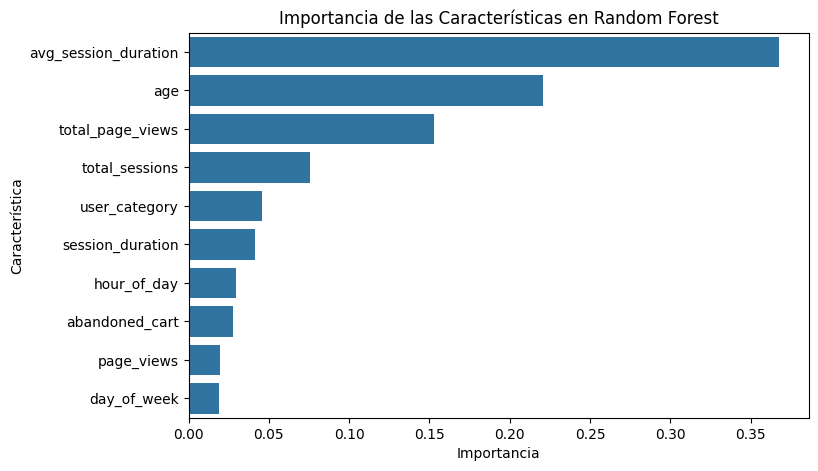

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# 1️⃣ Preparar los datos
features = ["age", "abandoned_cart", "user_category", "total_sessions", "avg_session_duration", 
            "total_page_views", "page_views", "session_duration", "day_of_week", "hour_of_day"]

# Convertir variables categóricas en numéricas
label_encoders = {}
for col in ["user_category"]:
    le = LabelEncoder()
    full_data[col] = le.fit_transform(full_data[col])  # Guardamos el encoder para aplicarlo a test después
    label_encoders[col] = le

# Definir X (características) e y (target)
X = full_data[features]
y = full_data["marketing_target"]

# Dividir en train y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2️⃣ Entrenar un Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3️⃣ Visualizar la importancia de las características
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]  # Ordenar de mayor a menor importancia

# Mostrar la importancia de las variables
plt.figure(figsize=(8, 5))
sns.barplot(x=importances[sorted_indices], y=np.array(features)[sorted_indices])
plt.title("Importancia de las Características en Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()


### Reevaluación de las correlaciones y distribuciones

#### Matriz de correlación  
1. **Confirmamos que `avg_session_duration` es la variable más correlacionada con `marketing_target` (0.42)** → Refuerza la importancia de esta variable en la predicción.  
2. **`total_sessions` y `total_page_views` están fuertemente correlacionadas (0.93)** → Son casi redundantes, por lo que podríamos eliminar una.  
3. **Las demás variables tienen correlaciones muy bajas con `marketing_target`** → `age`, `day_of_week`, `page_views`, `session_duration` y `abandoned_cart` no parecen ser muy predictivas.  

#### Histogramas
1. **`avg_session_duration` tiene una distribución aproximadamente normal**, lo que sugiere que puede funcionar bien en modelos lineales y árboles de decisión.  
2. **`total_sessions` y `total_page_views` tienen distribuciones sesgadas**, lo que podría beneficiarse de una transformación logarítmica.  
3. **`page_views` tiene pocos valores distintos**, lo que sugiere que no aporta mucha variabilidad al modelo.  
4. **`marketing_target` está fuertemente desbalanceado** → Podríamos considerar estrategias de balanceo para mejorar el rendimiento del modelo.  

###  Conclusiones y siguientes pasos
#### Variables a mantener  
✅ `avg_session_duration` → Mayor correlación y buena distribución.  
✅ `total_sessions` o `total_page_views` → Mantener solo una de ellas (probablemente `total_page_views`).  
✅ `age` → Aunque su correlación es baja, su importancia en el RF sugiere que puede aportar información útil.  
✅ `user_category` → Aunque su importancia en RF es baja, sigue siendo una variable categórica clave.  

#### Variables a descartar o transformar 
🔹 `day_of_week`, `hour_of_day`, `abandoned_cart`, `page_views`, `session_duration` → No aportan suficiente información.  
🔹 `total_sessions` o `total_page_views` → Elegir una y descartar la otra por colinealidad.  
🔹 Aplicar una **transformación logarítmica** a `total_page_views` si la mantenemos.  

# Benchmark

🔹 **Benchmark Random Forest Metrics**
Accuracy: 0.9971
F1 Score (macro): 0.9949
F1 Score (weighted): 0.9971

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1055
           2       1.00      0.99      1.00       202
           3       1.00      0.98      0.99       119

    accuracy                           1.00      1376
   macro avg       1.00      0.99      0.99      1376
weighted avg       1.00      1.00      1.00      1376



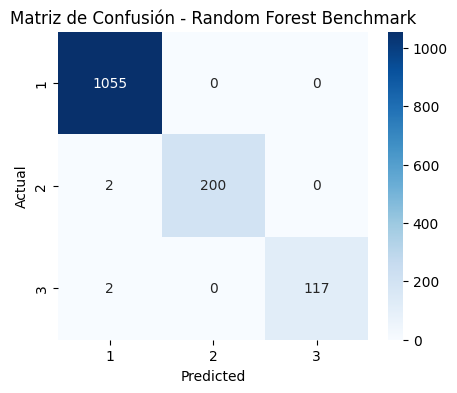

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Preparar los datos
features = ["age", "abandoned_cart", "user_category", "total_sessions", "avg_session_duration", 
            "total_page_views", "page_views", "session_duration", "day_of_week", "hour_of_day"]

# Convertir variables categóricas en numéricas
label_encoders = {}
for col in ["user_category"]:
    le = LabelEncoder()
    full_data[col] = le.fit_transform(full_data[col])  
    label_encoders[col] = le

# Definir X (características) e y (target)
X = full_data[features]
y = full_data["marketing_target"]

# Dividir en train y validación (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2️⃣ Entrenar un Random Forest básico
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3️⃣ Predicciones
y_pred = rf_model.predict(X_val)

# 4️⃣ Evaluación del modelo
print("🔹 **Benchmark Random Forest Metrics**")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"F1 Score (macro): {f1_score(y_val, y_pred, average='macro'):.4f}")
print(f"F1 Score (weighted): {f1_score(y_val, y_pred, average='weighted'):.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# 5️⃣ Matriz de Confusión
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - Random Forest Benchmark")
plt.show()


# Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1️⃣ Definir features y preparar los datos
features = ["age", "abandoned_cart", "user_category", "total_sessions", "avg_session_duration", 
            "total_page_views", "page_views", "session_duration", "day_of_week", "hour_of_day"]

# Convertir variables categóricas en numéricas
label_encoders = {}
for col in ["user_category"]:
    le = LabelEncoder()
    full_data[col] = le.fit_transform(full_data[col])  
    label_encoders[col] = le

# Definir X (features) e y (target)
X = full_data[features]
y = full_data["marketing_target"]

# 2️⃣ Configurar Stratified K-Fold (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3️⃣ Entrenar Random Forest con validación cruzada
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Calcular métricas con CV
f1_macro_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='f1_macro')
accuracy_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

# 4️⃣ Mostrar resultados
print("🔹 **Resultados de Validación Cruzada (5-Fold)**")
print(f"F1 Score (macro) - Promedio: {np.mean(f1_macro_scores):.4f} | Desviación: {np.std(f1_macro_scores):.4f}")
print(f"Accuracy - Promedio: {np.mean(accuracy_scores):.4f} | Desviación: {np.std(accuracy_scores):.4f}")


🔹 **Resultados de Validación Cruzada (5-Fold)**
F1 Score (macro) - Promedio: 0.9911 | Desviación: 0.0053
Accuracy - Promedio: 0.9952 | Desviación: 0.0028


# Prueba de generación de Json con Test


## Alineamos los datasets de test con `full_data`

In [38]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               6877 non-null   object        
 1   age                   6877 non-null   int64         
 2   abandoned_cart        6877 non-null   bool          
 3   user_category         6877 non-null   int64         
 4   marketing_target      6877 non-null   int64         
 5   total_sessions        6877 non-null   int64         
 6   avg_session_duration  6877 non-null   float64       
 7   total_page_views      6877 non-null   int64         
 8   session_id            6877 non-null   object        
 9   timestamp             6877 non-null   datetime64[ns]
 10  device_type           6877 non-null   category      
 11  browser               6877 non-null   category      
 12  operating_system      6877 non-null   category      
 13  ip_address        

In [39]:
session_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           3026 non-null   object
 1   session_id        3026 non-null   object
 2   timestamp         3026 non-null   object
 3   device_type       3026 non-null   object
 4   browser           3026 non-null   object
 5   operating_system  3026 non-null   object
 6   ip_address        3026 non-null   object
 7   country           3026 non-null   object
 8   search_query      3026 non-null   object
 9   page_views        3026 non-null   int64 
 10  session_duration  3026 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 260.2+ KB


In [40]:
user_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         300 non-null    object
 1   age             300 non-null    int64 
 2   abandoned_cart  300 non-null    bool  
 3   user_category   300 non-null    object
 4   test_id         300 non-null    int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 9.8+ KB


### Creación de X_test y X_train

In [41]:
# 1️⃣ Ajustar LabelEncoder con las clases originales en train
original_categories = ["new_user", "recurring_user", "premium_subscriber"]  # Las categorías originales en train
label_encoders["user_category"].classes_ = np.array(original_categories)  # Forzamos las clases correctas

# 2️⃣ Aplicar LabelEncoder a user_test ANTES del merge
user_test["user_category"] = label_encoders["user_category"].transform(user_test["user_category"])

# 3️⃣ Convertir el timestamp a datetime en session_test
session_test["timestamp"] = pd.to_datetime(session_test["timestamp"])

# Extraer características de fecha
session_test["day_of_week"] = session_test["timestamp"].dt.dayofweek
session_test["hour_of_day"] = session_test["timestamp"].dt.hour

# 4️⃣ Agregar información de sesiones por usuario
session_features = session_test.groupby("user_id").agg(
    total_sessions=("session_id", "count"),
    avg_session_duration=("session_duration", "mean"),
    total_page_views=("page_views", "sum"),
    page_views=("page_views", "sum"),  
    session_duration=("session_duration", "sum"),
    day_of_week=("day_of_week", "median"),
    hour_of_day=("hour_of_day", "median")
).reset_index()

# 5️⃣ Unir los datos de usuario con la información agregada de sesiones
user_test_merged = user_test.merge(session_features, on="user_id", how="left")

# 6️⃣ Rellenar valores nulos con la media de train
user_test_merged["total_sessions"] = user_test_merged["total_sessions"].fillna(full_data["total_sessions"].mean())
user_test_merged["avg_session_duration"] = user_test_merged["avg_session_duration"].fillna(full_data["avg_session_duration"].mean())
user_test_merged["total_page_views"] = user_test_merged["total_page_views"].fillna(full_data["total_page_views"].mean())
user_test_merged["page_views"] = user_test_merged["page_views"].fillna(full_data["page_views"].mean())
user_test_merged["session_duration"] = user_test_merged["session_duration"].fillna(full_data["session_duration"].mean())
user_test_merged["day_of_week"] = user_test_merged["day_of_week"].fillna(full_data["day_of_week"].median())
user_test_merged["hour_of_day"] = user_test_merged["hour_of_day"].fillna(full_data["hour_of_day"].median())

# 7️⃣ Seleccionar solo las columnas necesarias para predecir
features_test = ["age", "abandoned_cart", "user_category", "total_sessions", "avg_session_duration", 
                 "total_page_views", "page_views", "session_duration", "day_of_week", "hour_of_day"]

X_test = user_test_merged[features_test]

# 8️⃣ Verificar que las categorías de test ahora son correctas
print(f"Columnas en train: {list(X_train.columns)}")
print(f"Columnas en test: {list(X_test.columns)}")

print(f"Categorías en train: {np.unique(full_data['user_category'])}")
print(f"Categorías en test antes del merge: {np.unique(user_test['user_category'])}")
print(f"Categorías en user_test_merged después del merge: {np.unique(user_test_merged['user_category'])}")


Columnas en train: ['age', 'abandoned_cart', 'user_category', 'total_sessions', 'avg_session_duration', 'total_page_views', 'page_views', 'session_duration', 'day_of_week', 'hour_of_day']
Columnas en test: ['age', 'abandoned_cart', 'user_category', 'total_sessions', 'avg_session_duration', 'total_page_views', 'page_views', 'session_duration', 'day_of_week', 'hour_of_day']
Categorías en train: [0 1 2]
Categorías en test antes del merge: [0 1 2]
Categorías en user_test_merged después del merge: [0 1 2]


## Generación Json

In [42]:
# 1️⃣ Entrenar el modelo con TODOS los datos de train después de la validación cruzada
rf_model.fit(X, y)  # Ahora sí estará entrenado

# 2️⃣ Generar predicciones para test
y_test_pred = rf_model.predict(X_test)

# 3️⃣ Guardar en JSON
import json

predictions_dict = {
    "target": {int(k): int(v) for k, v in zip(user_test["test_id"], y_test_pred)}
}

with open("predictions.json", "w") as f:
    json.dump(predictions_dict, f)

print("✅ Archivo predictions.json generado correctamente.")

✅ Archivo predictions.json generado correctamente.
